In [2]:
# Importando bibliotecas e base de dados
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

jogo = pd.read_csv("Projeto_SAS_Cartola_v3.csv", encoding='latin-1', sep=';')
# jogo

In [3]:
# Trocando vírgula por ponto para análise do algoritmo
jogo['time_media_gol'] = jogo['time_media_gol'].str.replace(',','.').astype(np.float64)
jogo['time_media_lat'] = jogo['time_media_lat'].str.replace(',','.').astype(np.float64)
jogo['time_media_zag'] = jogo['time_media_zag'].str.replace(',','.').astype(np.float64)
jogo['time_media_mei'] = jogo['time_media_mei'].str.replace(',','.').astype(np.float64)
jogo['time_media_ata'] = jogo['time_media_ata'].str.replace(',','.').astype(np.float64)
jogo['time_adversario_media_gol'] = jogo['time_adversario_media_gol'].str.replace(',','.').astype(np.float64)
jogo['time_adversario_media_lat'] = jogo['time_adversario_media_lat'].str.replace(',','.').astype(np.float64)
jogo['time_adversario_media_zag'] = jogo['time_adversario_media_zag'].str.replace(',','.').astype(np.float64)
jogo['time_adversario_media_mei'] = jogo['time_adversario_media_mei'].str.replace(',','.').astype(np.float64)
jogo['time_adversario_media_ata'] = jogo['time_adversario_media_ata'].str.replace(',','.').astype(np.float64)
# jogo

In [4]:
# Trocando valores nulos por 0.0 e excluindo linhas com valores nulos (não existirá, somente para certeza)
jogo = jogo.fillna(0)
jogo = jogo[jogo.notna()]
# jogo

In [ ]:
# Coeficiente de Pearson
lista = []
for i in jogo:
    if jogo[i].dtypes != 'object':
        lista.append(i)

for i in lista:
    print(i)
    x = stats.pearsonr(jogo['time_resultado_anterior'], jogo[i])
    print(x)


In [ ]:
# Colunas do DataSet
jogo.info()

In [ ]:
jogo.loc[74]

In [50]:
# Analisando estrutura do DataSet
flamengo = jogo.loc[jogo['Time'].str.strip() == 'Flamengo'].sort_values(by=['time_rodada_anterior'])
# flamengo

In [ ]:
# Analisando linha com ID 47
# flamengo.loc[46]
flamengo.loc[274]

In [5]:
# Gerando dataSet de treino
dataSetTreino = jogo.loc[jogo['time_Rodada'] < 20]
# dataSetTreino


In [6]:
# Gerando DataSet de teste
dataSetTeste = jogo.loc[jogo['time_Rodada'] >= 19]
# dataSetTeste

In [ ]:
# Analisando estrutura do DataSet de treino
flamengo = dataSetTreino.loc[dataSetTreino['Time'].str.strip() == 'Flamengo'].sort_values(by=['time_rodada_anterior'])
# flamengo

Treino do Modelo com variáveis do DataSet reduzidas

In [15]:
# Setando variáveis que impactam na variável dependente (REDUZIDA)
x = jogo[[
        'time_posicao', 
        'time_mando_campo',
        'time_gols',
        'time_PTS', 
        'time_JG', 
        'time_E', 
        'time_D',
        'time_GP', 
        'time_GC', 
        'time_SG',  
        'time_adversario_Posicao', 
        'time_adversario_gols',
        'time_adversario_PTS', 
        'time_adversario_JG', 
        'time_adversario_E', 
        'time_adversario_D', 
        'time_adversario_GP', 
        'time_adversario_GC', 
        'time_adversario_SG'
    ]]
y = jogo['time_resultado_anterior']

# Treinando o modelo
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.15, random_state=0)

In [16]:
# Realizando predições 
logi_reg = LogisticRegression(solver='lbfgs', max_iter=300)
logi_reg.fit(x_treino, y_treino)
y_pred = logi_reg.predict(x_teste)

c:\Users\mauri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

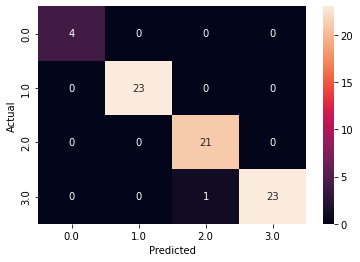

In [17]:
# Matriz de confusão do modelo
matriz_confusao = pd.crosstab(y_teste, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_confusao, annot=True)

In [18]:
print('Accuracy: ',metrics.accuracy_score(y_teste, y_pred))
plt.show()

Accuracy:  0.9861111111111112


In [19]:
# Função que verifica possível resultado em cada rodada (20 à 24) dos jogos.
def verificarResultado(rodada, rodadaAtual):
    x = 0
    for i,j in rodada.iterrows():
        # Mandante
        atualMandante = jogo.loc[jogo['Time'].str.strip() == j['Time']]
        atualMandante = atualMandante.loc[atualMandante['time_Rodada'] == rodadaAtual]

        # # Visitante
        atualVisitante = jogo.loc[jogo['Time'].str.strip() == j['time_adversario']]
        atualVisitante = atualVisitante.loc[atualVisitante['time_Rodada'] == rodadaAtual]
        
        # Rodada Futura
        rodadaFutura = jogo.loc[jogo['Time'].str.strip() == j['Time']]
        rodadaFutura = rodadaFutura.loc[rodadaFutura['time_rodada_anterior'] == rodadaAtual]

        teste = {
            'time_posicao': atualMandante['time_posicao'].values, 
            'time_mando_campo': atualMandante['time_mando_campo'].values, 
            'time_gols': atualMandante['time_gols'].values, 
            'time_PTS': atualMandante['time_PTS'].values, 
            'time_JG': atualMandante['time_JG'].values, 
            'time_E': atualMandante['time_E'].values, 
            'time_D': atualMandante['time_D'].values,
            'time_GP': atualMandante['time_GP'].values, 
            'time_GC': atualMandante['time_GC'].values, 
            'time_SG': atualMandante['time_SG'].values, 
            'time_adversario_Posicao': atualVisitante['time_posicao'].values, 
            'time_adversario_gols': atualVisitante['time_gols'].values, 
            'time_adversario_PTS': atualVisitante['time_PTS'].values, 
            'time_adversario_JG': atualVisitante['time_JG'].values, 
            'time_adversario_E': atualVisitante['time_E'].values, 
            'time_adversario_D': atualVisitante['time_D'].values, 
            'time_adversario_GP': atualVisitante['time_GP'].values, 
            'time_adversario_GC': atualVisitante['time_GC'].values, 
            'time_adversario_SG': atualVisitante['time_SG'].values
        }

        print("Jogo entre " + rodadaFutura['Time'].values + " e "+ rodadaFutura['time_adversario'].values)
        
        dft = pd.DataFrame(data=teste, index=[0])
        resultado = logi_reg.predict(dft)
        if resultado == 1:
            print(rodadaFutura['Time'].values + " ganha!")
        elif resultado == 2:
            print("Empate!")
        elif resultado == 3:
            print(rodadaFutura['time_adversario'].values + " ganha!")
        print()

# Filtrando a rodada para verificação dos resultados
# print("Rodada 23:")
rodada = jogo.loc[jogo['time_rodada_anterior'] == 23]
rodada = rodada.loc[rodada['time_mando_campo'] == 1.0]
verificarResultado(rodada, 23)
# rodada.loc[179]

['Jogo entre Fluminense e Coritiba']
['Fluminense ganha!']

['Jogo entre Athlético-PR e América-MG']
['América-MG ganha!']

['Jogo entre Palmeiras e Flamengo']
['Flamengo ganha!']

['Jogo entre Santos e São Paulo']
['São Paulo ganha!']

['Jogo entre Atlético-MG e Goiás']
Empate!

['Jogo entre Avaí e Internacional']
['Internacional ganha!']

['Jogo entre Bragantino e Ceará']
Empate!

['Jogo entre Juventude e Botafogo']
Empate!

['Jogo entre Fortaleza e Corinthians']
['Fortaleza ganha!']

['Jogo entre Atlético-GO e Cuiabá']
['Cuiabá ganha!']



Treino do Modelo com variáveis completas do DataSet

In [82]:
# Setando variáveis que impactam na variável dependente - (COMPLETA)
x1 = dataSetTreino[[
        'time_posicao', 
        'time_PTS', 
        'time_JG', 
        'time_E', 
        'time_D',
        'time_GP', 
        'time_GC', 
        'time_SG', 
        'time_media_gol',   
        'time_media_lat',
        'time_media_zag',      
        'time_media_mei',      
        'time_media_ata',      
        'time_media_tec',      
        'time_adversario_Posicao', 
        'time_adversario_PTS', 
        'time_adversario_JG', 
        'time_adversario_E', 
        'time_adversario_D', 
        'time_adversario_GP', 
        'time_adversario_GC', 
        'time_adversario_SG', 
        'time_adversario_media_gol',      
        'time_adversario_media_lat',      
        'time_adversario_media_zag',      
        'time_adversario_media_mei',      
        'time_adversario_media_ata',      
        'time_adversario_media_tec',      
    ]]
y1 = dataSetTreino['time_resultado_anterior']

# Treinando o modelo
x_treino1, x_teste1, y_treino1, y_teste1 = train_test_split(x1,y1,test_size=0.3, random_state=0)

In [83]:
# Realizando predições 
logi_reg = LogisticRegression()
logi_reg.fit(x_treino1, y_treino1)
y_pred1 = logi_reg.predict(x_teste1)

c:\Users\mauri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

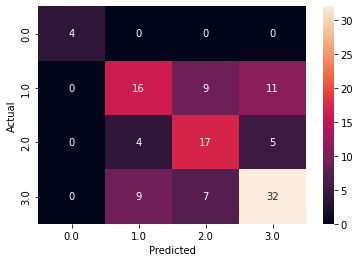

In [84]:
# Matriz de confusão do modelo
matriz_confusao = pd.crosstab(y_teste1, y_pred1, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_confusao, annot=True)

In [85]:
print('Accuracy: ',metrics.accuracy_score(y_teste1, y_pred1))
plt.show()

Accuracy:  0.6052631578947368


In [77]:
# Função que verifica possível resultado em cada rodada (20 à 24) dos jogos.
def verificarResultado(rodada, rodadaAtual):
    x = 0
    # print("Rodada " + str(rodadaAtual))

    with open('resultados_brasileirao.csv', 'a+', newline='') as arquivo:
        escrita = csv.writer(arquivo)
        escrita.writerow(["Rodada " + str(rodadaAtual)])

    for i,j in rodada.iterrows():        
        # Mandante
        atualMandante = jogo.loc[jogo['Time'].str.strip() == j['Time']]
        atualMandante = atualMandante.loc[atualMandante['time_Rodada'] == rodadaAtual]

        # # Visitante
        atualVisitante = jogo.loc[jogo['Time'].str.strip() == j['time_adversario']]
        atualVisitante = atualVisitante.loc[atualVisitante['time_Rodada'] == rodadaAtual]
        
        # Rodada Futura
        rodadaFutura = jogo.loc[jogo['Time'].str.strip() == j['Time']]
        rodadaFutura = rodadaFutura.loc[rodadaFutura['time_rodada_anterior'] == rodadaAtual]

        teste = {
            'time_posicao': atualMandante['time_posicao'].values, 
            'time_PTS': atualMandante['time_PTS'].values, 
            'time_JG': atualMandante['time_JG'].values, 
            'time_E': atualMandante['time_E'].values, 
            'time_D': atualMandante['time_D'].values,
            'time_GP': atualMandante['time_GP'].values, 
            'time_GC': atualMandante['time_GC'].values, 
            'time_SG': atualMandante['time_SG'].values, 
            'time_media_gol': atualMandante['time_media_gol'].values, 
            'time_media_lat': atualMandante['time_media_lat'].values, 
            'time_media_zag': atualMandante['time_media_zag'].values, 
            'time_media_mei': atualMandante['time_media_mei'].values, 
            'time_media_ata': atualMandante['time_media_ata'].values, 
            'time_media_tec': atualMandante['time_media_tec'].values, 
            'time_adversario_Posicao': atualVisitante['time_posicao'].values, 
            'time_adversario_PTS': atualVisitante['time_PTS'].values, 
            'time_adversario_JG': atualVisitante['time_JG'].values, 
            'time_adversario_E': atualVisitante['time_E'].values, 
            'time_adversario_D': atualVisitante['time_D'].values, 
            'time_adversario_GP': atualVisitante['time_GP'].values, 
            'time_adversario_GC': atualVisitante['time_GC'].values, 
            'time_adversario_SG': atualVisitante['time_SG'].values, 
            'time_adversario_media_gol': atualVisitante['time_media_gol'].values,
            'time_adversario_media_lat': atualVisitante['time_media_lat'].values,
            'time_adversario_media_zag': atualVisitante['time_media_zag'].values,
            'time_adversario_media_mei': atualVisitante['time_media_mei'].values,
            'time_adversario_media_ata': atualVisitante['time_media_ata'].values,
            'time_adversario_media_tec': atualVisitante['time_media_tec'].values 
        }

        print("Jogo entre " + rodadaFutura['Time'].values + " e "+ rodadaFutura['time_adversario'].values)
        
        dft = pd.DataFrame(data=teste, index=[0])
        resultado = logi_reg.predict(dft)
        if resultado == 1:
            print(rodadaFutura['Time'].values + " ganha!")
        elif resultado == 2:
            print("Empate!")
        elif resultado == 3:
            print(rodadaFutura['time_adversario'].values + " ganha!")

        # with open('resultados_brasileirao.csv', 'a+', newline='') as arquivo:
        #     escrita = csv.writer(arquivo)
        #     escrita.writerow(["Jogo entre " + rodadaFutura['Time'].values + " e "+ rodadaFutura['time_adversario'].values])
            
        #     if resultado == 1:
        #         escrita.writerow([rodadaFutura['Time'].values + " ganha!"])
        #     elif resultado == 2:
        #         escrita.writerow(["Empate!"])
        #     elif resultado == 3:
        #         escrita.writerow([rodadaFutura['time_adversario'].values + " ganha!"])

        #     escrita.writerow([])
        print()

# Filtrando a rodada para verificação dos resultados
# print("Rodada 23:")
# rodada = dataSetTeste.loc[dataSetTeste['time_rodada_anterior'] == 23]
# rodada = rodada.loc[rodada['time_mando_campo'] == 1.0]
# verificarResultado(rodada, 23)
# rodada

In [79]:
rodadasRepetidas = [dataSetTeste['time_Rodada'].values]
rodadasFiltradas = []

# Criando uma lista com os números das rodadas para previsão
for i in rodadasRepetidas[0]:
    if not(i in rodadasFiltradas):
        rodadasFiltradas.append(i)

rodadasFiltradas.pop()
# Resultados de todas as rodadas que utilizamos para prever
for i in rodadasFiltradas:
    rodada = dataSetTeste.loc[dataSetTeste['time_Rodada'] == i]
    rodada = rodada.loc[rodada['time_mando_campo'] == 1.0]
    print("Rodada " + str(i))
    verificarResultado(rodada, i)
    print()



Rodada 19
['Jogo entre Botafogo e Athlético-PR']
['Athlético-PR ganha!']

['Jogo entre Fluminense e Bragantino']
['Fluminense ganha!']

['Jogo entre Coritiba e Cuiabá']
['Cuiabá ganha!']

['Jogo entre Juventude e Ceará']
['Ceará ganha!']

['Jogo entre São Paulo e Goiás']
Empate!

['Jogo entre Atlético-MG e Corinthians']
Empate!

['Jogo entre Avaí e Flamengo']
['Flamengo ganha!']

['Jogo entre Fortaleza e Santos']
['Santos ganha!']

['Jogo entre Atlético-GO e América-MG']
['América-MG ganha!']

['Jogo entre Palmeiras e Internacional']
['Palmeiras ganha!']


Rodada 20
['Jogo entre Athlético-PR e São Paulo']
['Athlético-PR ganha!']

['Jogo entre Goiás e Coritiba']
Empate!

['Jogo entre América-MG e Avaí']
['América-MG ganha!']

['Jogo entre Cuiabá e Fortaleza']
['Cuiabá ganha!']

['Jogo entre Ceará e Palmeiras']
Empate!

['Jogo entre Flamengo e Atlético-GO']
['Flamengo ganha!']

['Jogo entre Corinthians e Botafogo']
['Corinthians ganha!']

['Jogo entre Santos e Fluminense']
Empate!

['Jog